# Time Series

**Dataset:** https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/blob/master/data/AirPassengers.csv

I am predicting aripassengs for next 5 yeras using forcast of `ARIMA` and `SSARIMA`statistical models.
you can find my dataset from above link or search for **AirPassengers.csv for time series forcasting** on Google.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Importing datasets
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Converting Month column in datetime
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [4]:
# Set Month as index
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


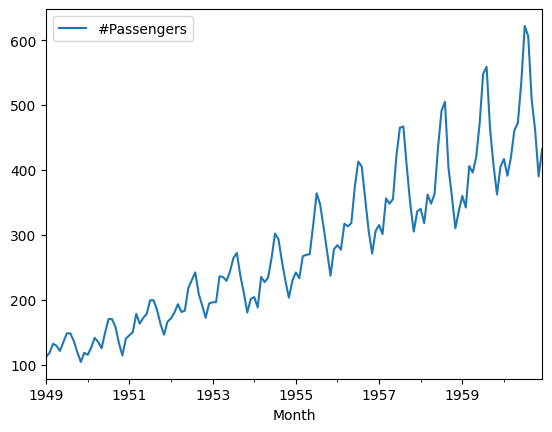

In [6]:
# Ploting data of 'AirPassengers.csv'
df.plot();

In [7]:
# Taking mean and std of privios 12 months
mean_log = df.rolling(window=12).mean()
std_log = df.rolling(window=12).std()

In [8]:
mean_log[:15],std_log[:15]

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01   126.666667
 1950-01-01   126.916667
 1950-02-01   127.583333
 1950-03-01   128.333333,
             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01    13.720147
 1950-01-01    13.453342
 1950-02-01    13.166475
 1950-03-01    13.686977)

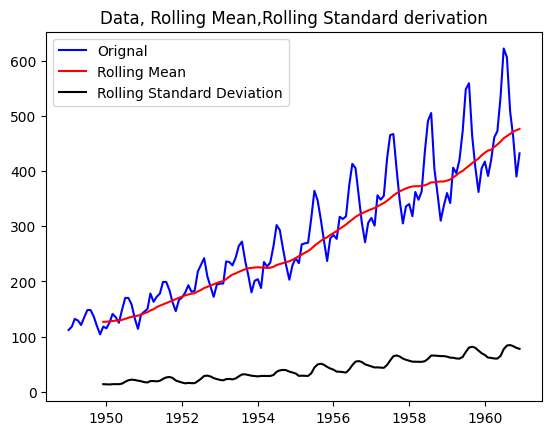

In [9]:
# Cheking series is stationary or not.
plt.plot(df,color='blue',label='Orignal')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Standard Deviation')
plt.title('Data, Rolling Mean,Rolling Standard derivation')
plt.legend();

In [10]:
# Cheking stationarity of Time series
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['#Passengers'])
result

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
# cheking Results of ADFILLER Test 
results = adfuller(df['#Passengers'].diff().dropna())
print(results)

(-2.8292668241700034, 0.05421329028382497, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)


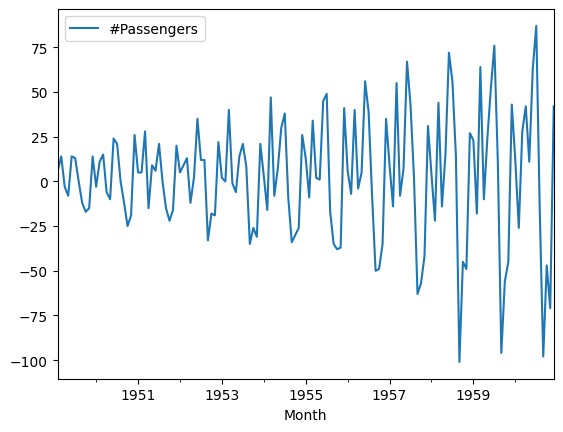

In [12]:
# Tring to make model Stationary
df['#Passengers'].diff().dropna().plot()
plt.legend();

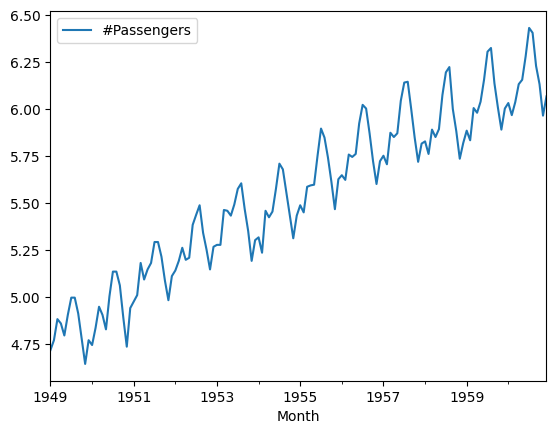

In [13]:
# Taking log of series to make stationary
first_log = np.log(df)
first_log.plot()
plt.legend();

In [14]:
# Cheking for Stationarity
results_log = adfuller(first_log['#Passengers']) 
results_log

(-1.717017089106967,
 0.42236677477038814,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

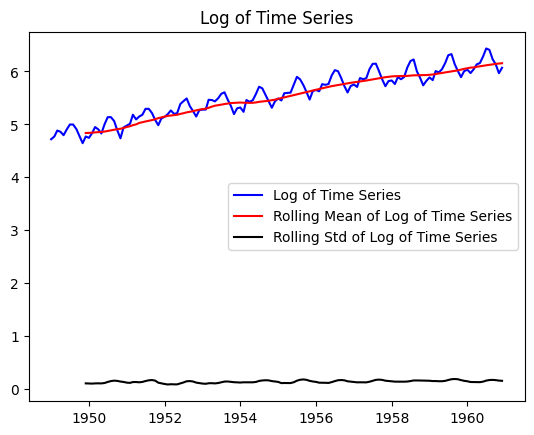

In [15]:
# Plot grow of log(time series)
mean_first_log = first_log.rolling(window=12).mean()
std_first_log = first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Log of Time Series')
plt.plot(mean_first_log,color='red',label='Rolling Mean of Log of Time Series')
plt.plot(std_first_log,color='black',label='Rolling Std of Log of Time Series')
plt.title('Log of Time Series')
plt.legend()
plt.show()

In [16]:
# Making data stationary
new_data = first_log-mean_first_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [17]:
# cheking Results of ADFILLER Test 
result_of_new_data = adfuller(df['#Passengers'])
print(result_of_new_data)

(0.8153688792060441, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


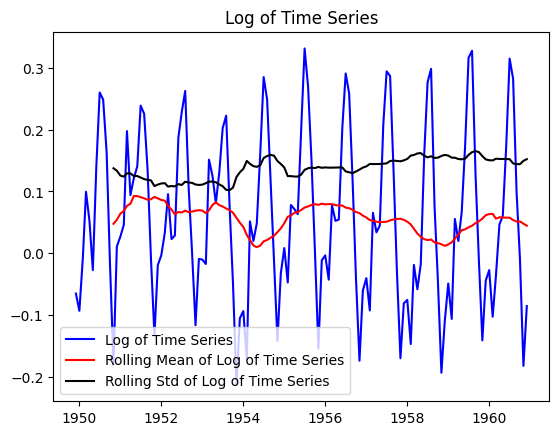

In [18]:
# plot graph
new_mean_first_log = new_data.rolling(window=12).mean()
new_std_first_log = new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Log of Time Series')
plt.plot(new_mean_first_log,color='red',label='Rolling Mean of Log of Time Series')
plt.plot(new_std_first_log,color='black',label='Rolling Std of Log of Time Series')
plt.title('Log of Time Series')
plt.legend()
plt.show()

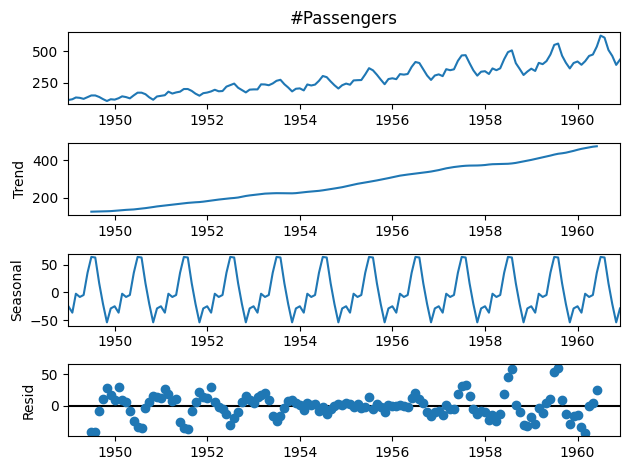

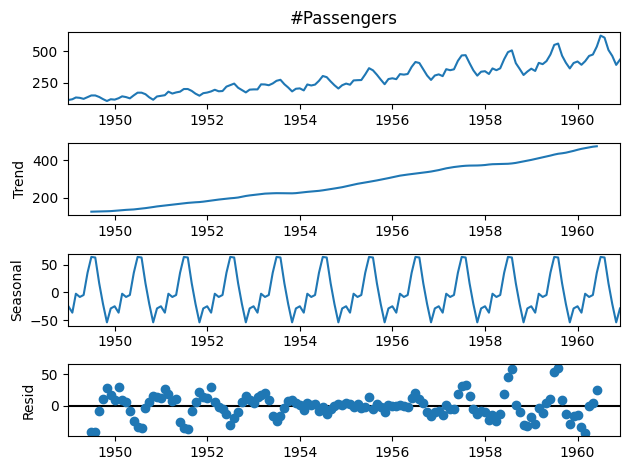

In [19]:
# Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
depcompose_result = seasonal_decompose(df['#Passengers'].dropna())
depcompose_result.plot()

<AxesSubplot: xlabel='Month'>

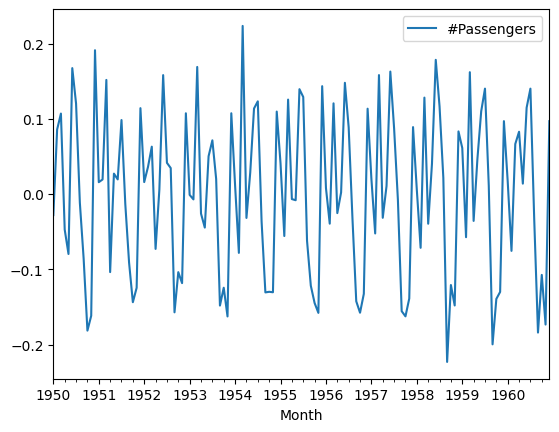

In [20]:
# Checking First order difference model for trend 
new_data.diff().dropna().plot()

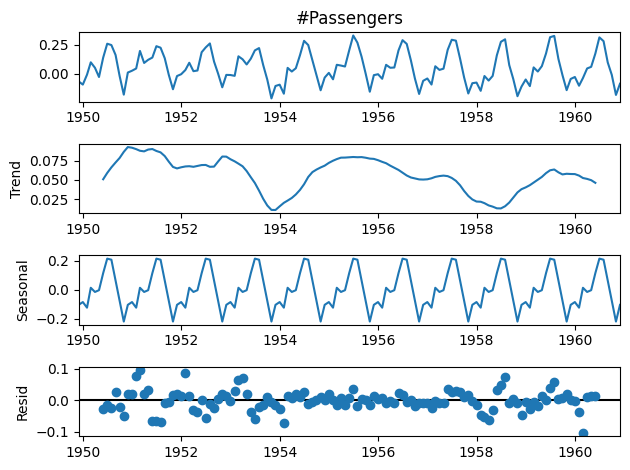

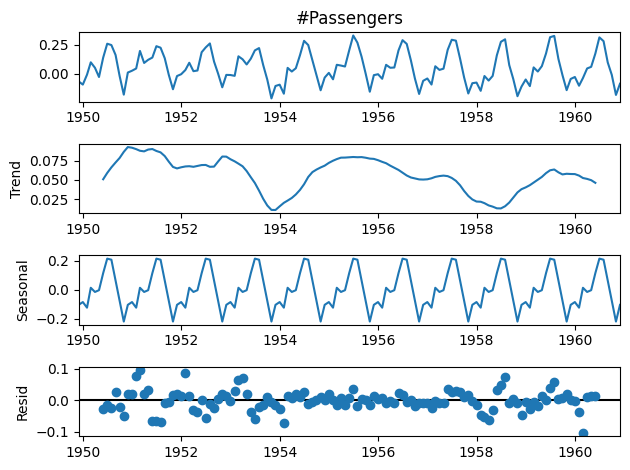

In [21]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
depcomposition_results = seasonal_decompose(new_data['#Passengers'])
depcomposition_results.plot()

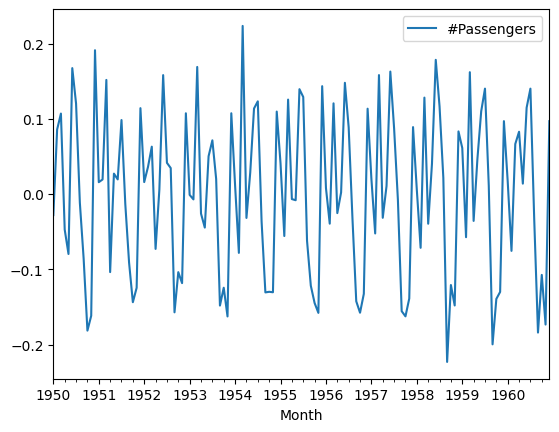

In [22]:
# Checking second order difference model for trend
new_data.diff().dropna().plot();

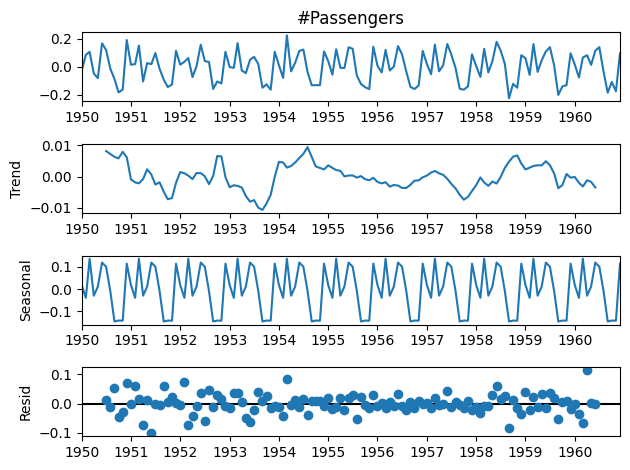

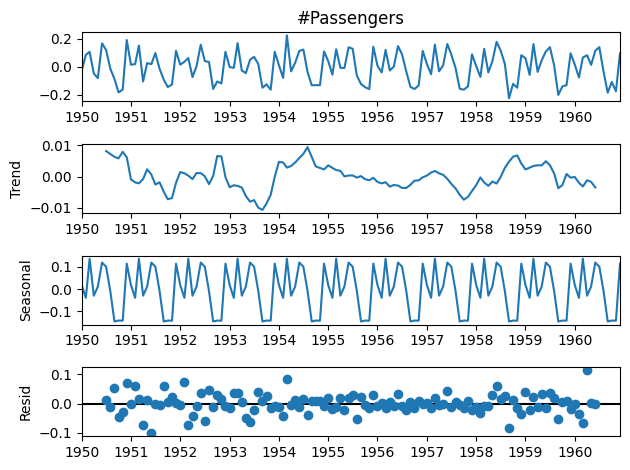

In [23]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
depcomposition_results = seasonal_decompose(new_data['#Passengers'].diff().dropna())
depcomposition_results.plot()

ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters p and q. Also, we always plot the ACF and PACF plots after making the time series stationary.

Plot aACF - Autocorrelation Function PACF- PArtial Autocorrelation function

C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


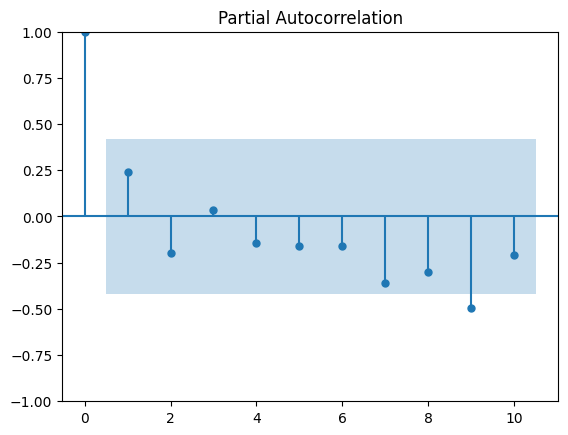

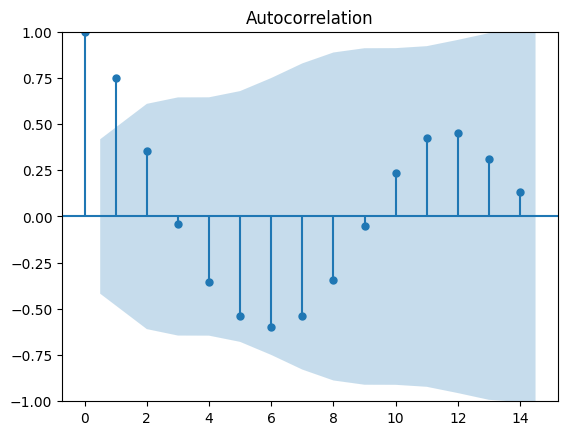

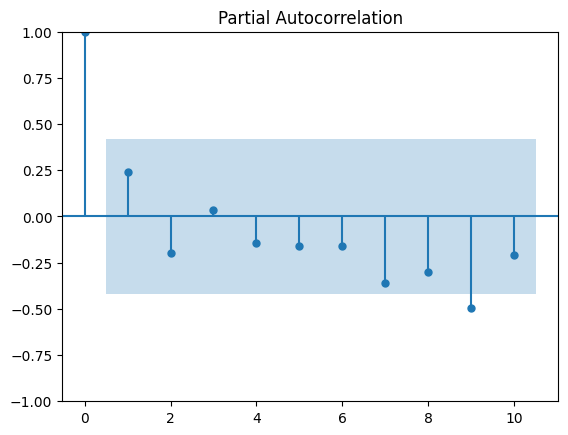

In [24]:
# Plot acf and pacf for values of p,d,q
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot = acf(new_data)
pacf_plt = pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plt,lags=10)

In [25]:
len(df)

144

In [26]:
# Making test Train test split and Fitting Arima Model
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:126]['#Passengers']
test = new_data.iloc[126:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  126
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 125.851
Date:                Sun, 29 Jan 2023   AIC                           -241.702
Time:                        06:53:02   BIC                           -227.521
Sample:                    12-01-1949   HQIC                          -235.941
                         - 05-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0525      0.021      2.498      0.013       0.011       0.094
ar.L1          0.4387      0.308      1.424      0.154      -0.165       1.042
ma.L1          0.5805      0.315      1.844      0.065      -0.037       1.197
ma.L2         -0.0898      0.273     -0.329      0.742      -0.624       0.445
sigma2         0.0079      0.002      4.997      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.72
Prob(Q):                              0.90   Prob(JB):                         0.06
Heteroskedasticity (H):               1.15   Skew:                            -0.07
Prob(H) (two-sided):                  0.65   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# cheking lenght of train Test Split
len(train),len(test)

(126, 7)

In [28]:
# Storing the Pridiction data in the form of DataFrame 
new_data['Predict'] = model_fit.predict(start=100,end=len(train)+len(test)-1,dynamic=True)
new_data

,#Passengers,Predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.052508
1960-09-01,0.098235,0.052508
1960-10-01,-0.009230,0.052508


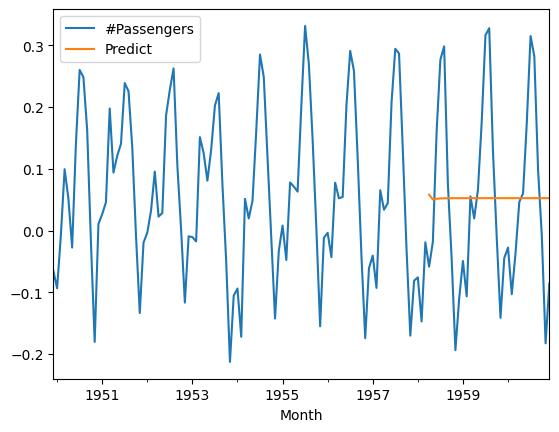

In [29]:
# Ploting The pricition Of Arima Model
new_data[['#Passengers','Predict']].plot();

In [30]:
# Making Sarimax Model and fitting that
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model_ = SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_f = model_.fit()

C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\gtech\anaconda3\envs\tf\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
# Storing the Pridiction data in the form of DataFrame of Sarimax model
new_data['Predict'] = model_f.predict(start=100,end=len(train)+len(test)-1,dynamic=True)
new_data

,#Passengers,Predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.249252
1960-09-01,0.098235,0.116089
1960-10-01,-0.009230,-0.026286


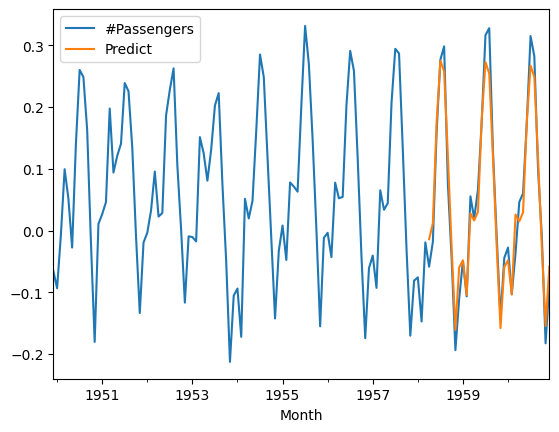

In [32]:
new_data.plot();

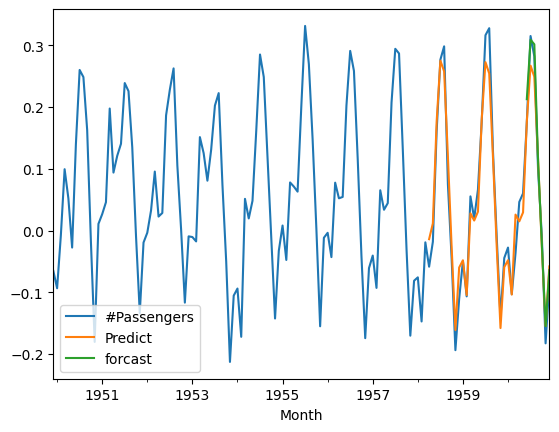

In [33]:
# pedicting the projection of next 5 years.
new_data["forcast"] = model_f.forecast(steps=800)
new_data.plot();

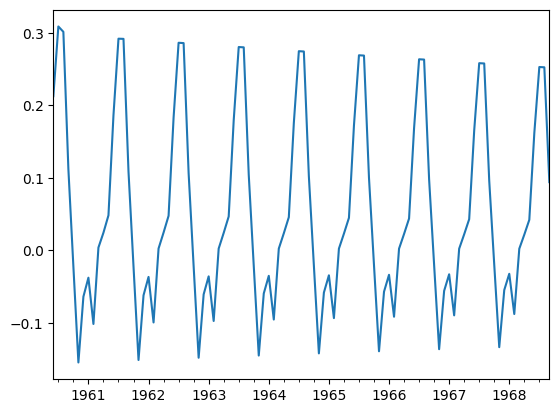

In [34]:
# predicting the projections for the next 5 years
forecast = model_f.forecast(steps=100)
forecast.plot();

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
prediction=new_data[100:]

# Cheking errors Mean Absolute Error
mean_absolute_error(prediction['#Passengers'],prediction['Predict'])

0.0255884882950675

In [36]:
# Cheking Mean Squared Error 
mean_squared_error(prediction['#Passengers'],prediction['Predict'])

0.0009916487926876576

In [37]:
# Cheking Mean Absolute Percentage Error
mean_absolute_percentage_error(prediction['#Passengers'],prediction['Predict'])

0.4310249751551968

# *The End*

-------------